# Breast Cancer Prediction

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 9-Oct-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

**Dataset:** [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

---

## 1. Introduction
Breast cancer is one of the most common types of cancer affecting women worldwide. Early detection can significantly improve the chances of successful treatment. In this notebook, we use the Breast Cancer Wisconsin dataset to build a classification model that predicts whether a tumor is benign or malignant based on various diagnostic measurements.

### Objective:

* Build a predictive model using Logistic Regression to classify breast cancer as benign or malignant.
* Evaluate the model's performance using accuracy and a confusion matrix.

---

## 2. Importing Necessary Libraries

In [49]:
# import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

---

## 3. Loading and Reviewing the Dataset
Let's load the dataset and take an initial look at its structure.

In [12]:
# loading and reviewing the dataset
df = pd.read_csv("Breast-Cancer-data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Observation:
* The dataset contains 569 rows and 33 columns. However, some columns like id and Unnamed: 32 are not needed for analysis.
---

## 4. Data Cleaning
We'll drop the unnecessary columns to streamline our analysis.

In [14]:
# dropping of the id and Unnamed: 32 column
df.drop(columns=['id','Unnamed: 32'],axis=1,inplace=True)

### Observation:
Two columns have been removed, leaving 31 columns for our analysis.

---

## 5. Exploratory Data Analysis (EDA)
### 5.1 Checking the Distribution of Target Variable

In [30]:
# Checking out the value counts of diagnosis column
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

### Observation:
* The dataset is slightly imbalanced, with more benign cases (B) than malignant (M).

### 5.2 Encoding Target Variable

In [31]:
# converting diagnosis column into numerical values (Malignant [M] = 1, Benign [B] = 0)
df['diagnosis'].replace({'M':1,'B':0},inplace=True)

---

## 6. Statistical Summary
We'll review the statistical summary of the dataset to get a sense of the feature distributions.

In [33]:
# checking out the statistical description
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 6.1 Grouping by Target Variable

In [35]:
# checking out the mean value of just "Diagnosis" column
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


### Observation:
* Malignant tumors tend to have higher values for radius, texture, perimeter, and area compared to benign tumors.
---

## 7. Correlation Analysis
To understand the relationships between the features, we'll visualize the correlation matrix.

<Axes: >

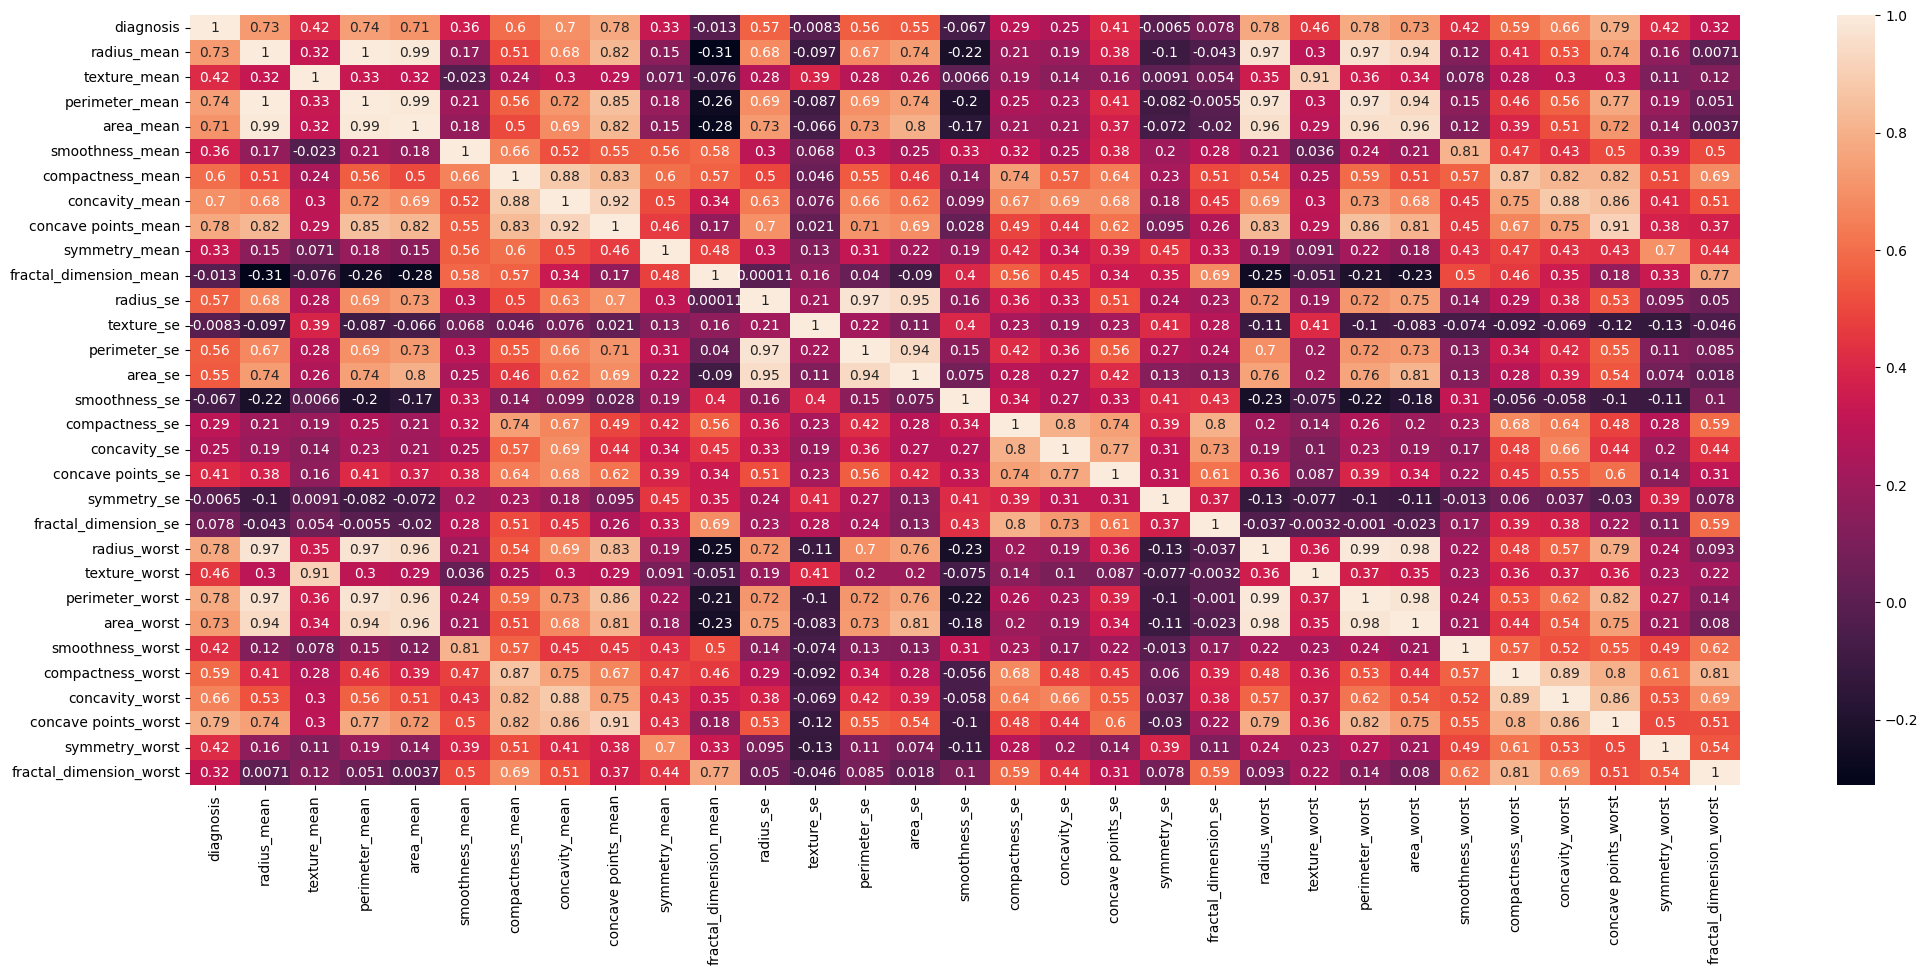

In [34]:
# Visulizing the correlation by plotting
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)

### Observation:
* Strong correlations are observed among features like radius, perimeter, and area, indicating potential multicollinearity.
---

## 8. Feature and Target Separation

In [37]:
# seperating the features and target
x = df.drop(columns=['diagnosis'],axis=1)
y = df['diagnosis']

---

## 9. Splitting the Dataset
We'll split the dataset into training and testing sets to evaluate the model's performance on unseen data.

In [40]:
# splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42 )

---

## 10. Model Training
We'll train a Logistic Regression model on the training data.

In [41]:
# training the model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

---

## 11. Model Evaluation
### 11.1 Training Accuracy

In [42]:
# Predicting on the training set
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9494505494505494


### 11.2 Testing Accuracy

In [45]:
# Predicting on the test set
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)
print('Accuracy score of testing data : ', test_data_accuracy)

Accuracy score of testing data :  0.9736842105263158


### Observation:
* The model achieves good accuracy on both the training and testing sets.

### 11.3 Confusion Matrix

<Axes: >

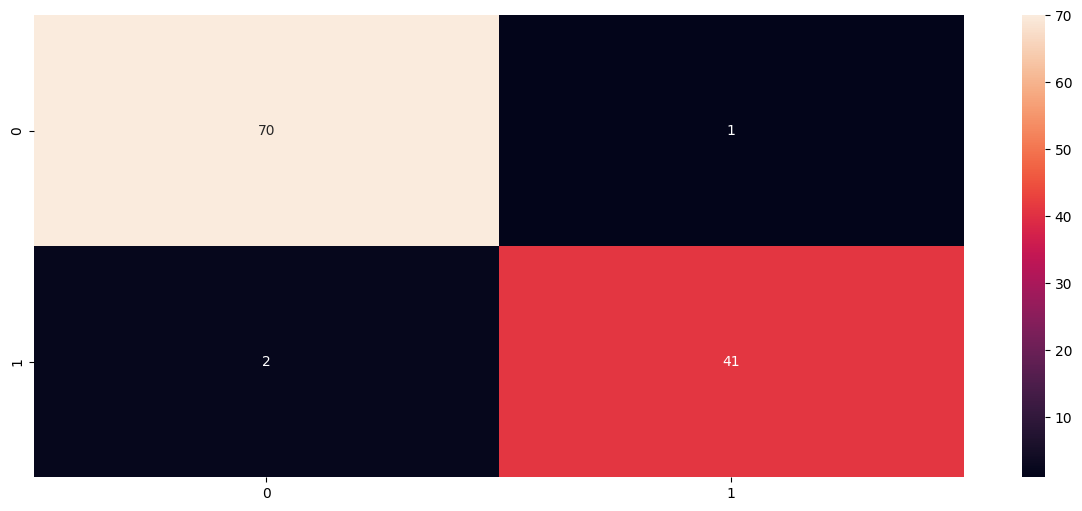

In [56]:
# plotting the score
plt.figure(figsize=(15,6))
sns.heatmap(confusion_matrix(y_test,x_test_prediction),annot=True)

---

## 12. Making Predictions on New Data
Let's test the model on a sample input to predict whether the tumor is malignant or benign.

In [61]:
# predicting the example
input = (12.31,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.02272,0.172,0.05914,0.2505,1.025,1.74,19.68,0.004854,0.01819,0.01826,0.007965,0.01386,0.002304,14.11,23.21,89.71,611.1,0.1176,0.1843,0.1703,0.0866,0.2618,0.07609)
input_data_as_numpy_array = np.asarray(input)
reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(reshape)

if (prediction[0] == 0):
  print('The breast cancer is Malignant')
  
else:
  print('The breast cancer is Benign')

The breast cancer is Malignant


## 13. Conclusion:

In this notebook, we successfully built a Logistic Regression model to predict whether a breast tumor is malignant or benign using the Breast Cancer Wisconsin dataset. We performed exploratory data analysis, visualized correlations between features, and evaluated the model using accuracy and a confusion matrix. The model achieved high accuracy on both the training and testing sets, indicating it can be a useful tool in breast cancer diagnosis.

Key Takeaways:
* Logistic Regression proved effective with an accuracy score of over 90% on the test set.
* The dataset was slightly imbalanced, but the model still performed well.
* Feature selection and correlation analysis helped in understanding the relationships between diagnostic features.